https://colab.research.google.com/drive/11iBiBM58MXyrHedrGo1pqTucmlBDPbjn

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import regularizers

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [0]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.

In [0]:
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_val = np_utils.to_categorical(y_val, n_classes)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


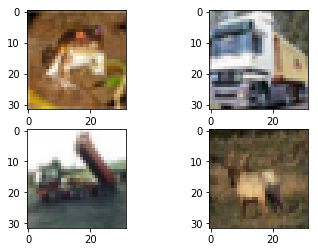

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(X_train[0].reshape(32,32,3), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(222)
plt.imshow(X_train[1].reshape(32,32,3), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(223)
plt.imshow(X_train[2].reshape(32,32,3), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(224)
plt.imshow(X_train[3].reshape(32,32,3), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.show()

In [0]:
input_shape = X_train[0].shape

In [0]:
weight_decay = 1e-4

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
from keras.optimizers import Adam
adam = Adam(lr = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, batch_size=32,epochs=10, verbose=1, validation_data=(X_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 24s 475us/step - loss: 2.3624 - acc: 0.3462 - val_loss: 2.0251 - val_acc: 0.3974
Epoch 2/10
50000/50000 [==============================] - 18s 365us/step - loss: 1.8471 - acc: 0.4526 - val_loss: 2.3142 - val_acc: 0.3506
Epoch 3/10
50000/50000 [==============================] - 18s 362us/step - loss: 1.6564 - acc: 0.5448 - val_loss: 1.9269 - val_acc: 0.4685
Epoch 4/10
50000/50000 [==============================] - 18s 359us/step - loss: 1.5591 - acc: 0.5785 - val_loss: 1.6316 - val_acc: 0.5760
Epoch 5/10
50000/50000 [==============================] - 18s 367us/step - loss: 1.4143 - acc: 0.6190 - val_loss: 1.5085 - val_acc: 0.6037
Epoch 6/10
50000/50000 [==============================] - 18s 357us/step - loss: 1.3683 - acc: 0.6295 - val_loss: 2.2122 - val_acc: 0.4998
Epoch 7/10
50000/50000

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


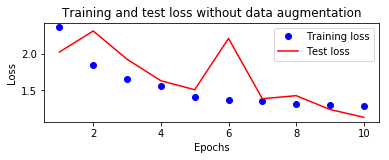

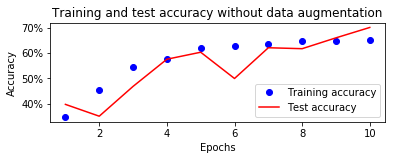

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss without data augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy without data augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# Data augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )

In [0]:
datagen.fit(X_train)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
from keras.optimizers import Adam
adam = Adam(lr = 0.01)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [0]:
# Defining batch size
batch_size=32
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),steps_per_epoch=X_train.shape[0] // batch_size, epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
1562/1562 [==============================] - 33s 21ms/step - loss: 1.8383 - acc: 0.4247 - val_loss: 1.6037 - val_acc: 0.5426
Epoch 2/10
1562/1562 [==============================] - 31s 20ms/step - loss: 1.2372 - acc: 0.5946 - val_loss: 1.3674 - val_acc: 0.5905
Epoch 3/10
1562/1562 [==============================] - 31s 20ms/step - loss: 1.0580 - acc: 0.6577 - val_loss: 0.9307 - val_acc: 0.7079
Epoch 4/10
1562/1562 [==============================] - 31s 20ms/step - loss: 0.9673 - acc: 0.6906 - val_loss: 0.9300 - val_acc: 0.7177
Epoch 5/10
1562/1562 [==============================] - 31s 20ms/step - loss: 0.9164 - acc: 0.7193 - val_loss: 0.8864 - val_acc: 0.7364
Epoch 6/10
1562/1562 [==============================] - 30s 19ms/step - loss: 0.8816 - acc: 0.7357 - val_loss: 0.7528 - val_acc: 0.7839
Epoch 7/10
1562/1562 [==============================] - 30s 19ms/step - loss: 0.8587 - acc: 0.7489 - val_loss: 1.0834 - val_acc: 0.6970
Epoch 8/10
1562/1562 [==========================

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


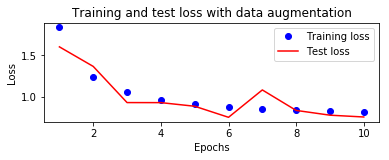

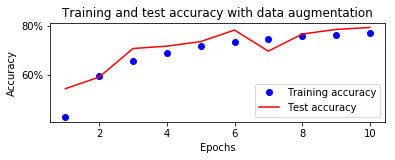

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss with data augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy with data augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()